<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/18_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 패션 MNIST 데이터셋을 훈련 세트와 테스트 세트로 반환하기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


In [3]:
# 합성곱 신경망 모델 생성하기

In [4]:
# Conv2D() : 입력의 너비와 높이 방향의 합성곱 연산을 구현하는 클래스
# MaxPooling2D() : 입력의 너비와 높이를 줄이는 풀링 연산을 구현하는 클래스
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

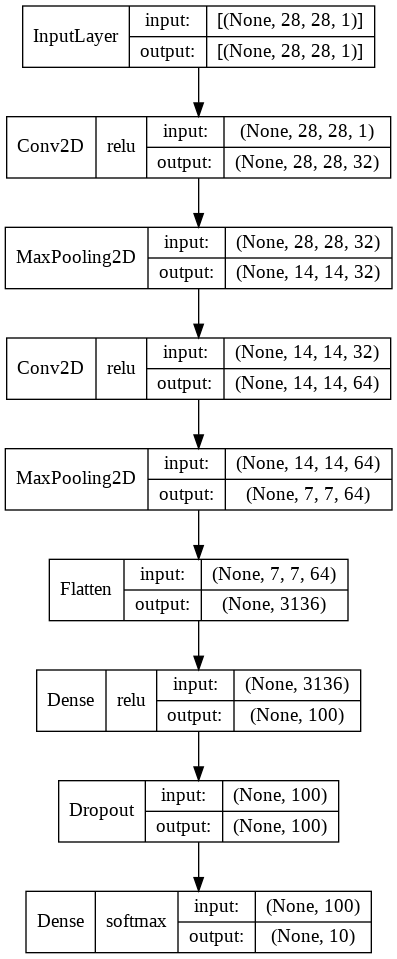

In [6]:
# 합성곱 신경망 모델 구조 도식화하기
from numpy import show_config
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True)

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 16s 4ms/step - loss: 0.5140 - accuracy: 0.8150 - val_loss: 0.3265 - val_accuracy: 0.8788
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3461 - accuracy: 0.8748 - val_loss: 0.2947 - val_accuracy: 0.8909
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2992 - accuracy: 0.8926 - val_loss: 0.2741 - val_accuracy: 0.9011
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2670 - accuracy: 0.9034 - val_loss: 0.2437 - val_accuracy: 0.9107
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2436 - accuracy: 0.9112 - val_loss: 0.2382 - val_accuracy: 0.9126
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2223 - accuracy: 0.9189 - val_loss: 0.2353 - val_accuracy: 0.9102
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2037 - accuracy: 0.9241 - val_loss: 0.2343 - val_accuracy

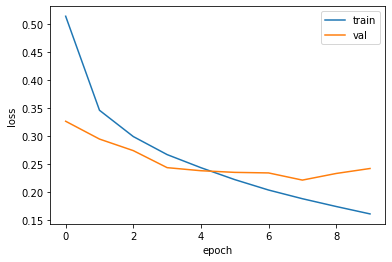

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [9]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2215 - accuracy: 0.9183


[0.22147035598754883, 0.9183333516120911]

In [10]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2387 - accuracy: 0.9177


[0.23873770236968994, 0.9176999926567078]

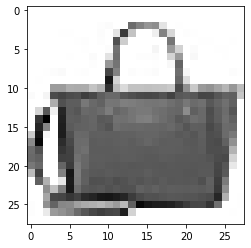

In [11]:
# 새로운 데이터(검증 세트의 첫번째 데이터)
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r') 
plt.show()

In [12]:
# 새로운 데이터에 대한 예측
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 141ms/step
[[8.2348490e-16 1.6008525e-28 1.4872887e-20 2.6051230e-18 5.6490621e-18
  7.0288739e-17 1.5539293e-18 1.4773841e-17 1.0000000e+00 3.5535928e-16]]


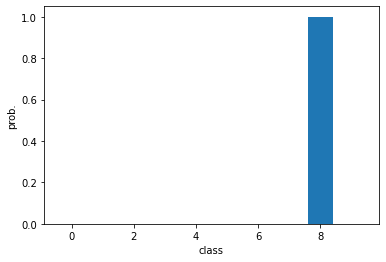

In [13]:
plt.bar(range(0, 10), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [14]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [15]:
preds = model.predict(val_scaled[0:1])

1/1 [==============================] - 0s 20ms/step


In [16]:
# 예측 결과 출력
import numpy as np
print(classes[np.argmax(preds)])

가방
